<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller de metodos computacionales - Melanie Andrea Muñoz Chavarria

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


Problema.

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

5. Realice un ajuste a la curva construida en el apartado anterior.

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.



Solucion teorica

In [ ]:
import numpy as np
from scipy.integrate import odeint
import sympy as sy
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


In [ ]:
def v_viento(v,t,b,u,theta):
  g=9.8
  theta_=np.deg2rad(theta)
  dv_x=-b*(v[0]-u*np.cos(theta_))
  dv_y=-g-b*(v[1]-u*np.sin(theta_))

  v=np.array([dv_x,dv_y])

  return v

$b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $v_x=50m/s$, $v_y=0 m/s$

In [ ]:
#Condiciones inciales
v_0=np.array([50,10]) #m/s

#Constantes
b=0.05
theta_=60 #[deg]
u=v_0[0]/2 #m/s


#Intervalo a evaluar solución
t=np.linspace(0,8.11,1000)

In [ ]:
#Solución para la edo, dadas las condiciones iniciales
sol=odeint(v_viento,v_0,t, args=(b,u,theta_))

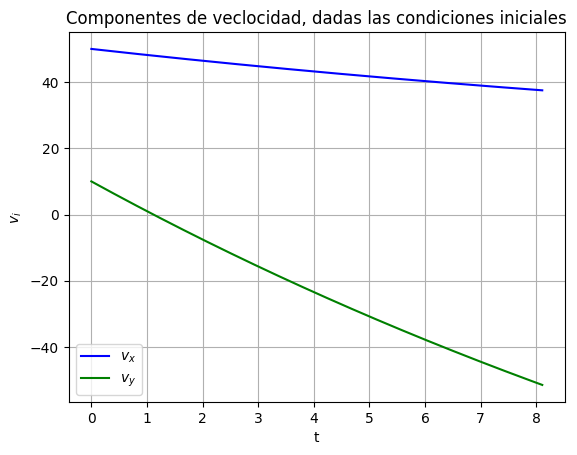

In [ ]:
#Graficando el resultado
plt.plot(t, sol[:, 0], 'b', label='${v_x}$')
plt.plot(t, sol[:, 1], 'g', label='${v_y}$')
plt.legend(loc='best')
plt.title('Componentes de veclocidad, dadas las condiciones iniciales')
plt.ylabel('${v_i}$')
plt.xlabel('t')
plt.grid()
plt.show()

3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  


In [ ]:
#Posición en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = (u*np.cos(alpha)*t)+(1/b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp((-1)*b*t))
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):
  y = (1/b)*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp((-1)*b*t))-((g/b)-u*np.sin(alpha))*t
  return y

In [ ]:
#Para econtrar el tiempo de vuelo final para hacer el linspace

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8
Params = (theta, alpha, v0, b, u,g)  #Parametros en tupla, agreando el valor de theta

y_valor=lambda t: (1/b)*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp((-1)*b*t))-((g/b)-u*np.sin(alpha))*t

#Usando bisección para calcular la raíz


tiempo_final=optimize.newton(y_valor,10)
print(tiempo_final)

8.11162702209557


In [ ]:
#Intervalo para el tiempo, con 1000 puntos
ti=np.linspace(0,tiempo_final,1000)

#Evaluación de la función en los puntos para el intervalo de t
x=pos_x(ti,*Params)
y=pos_y(ti,*Params)

#Diccionario
data={'X':x,'Y':y,'Tiempo':ti}

#Data Frame
df=pd.DataFrame.from_dict(data)
df

,X,Y,Tiempo
0,0.000000,0.000000e+00,0.000000
1,0.344372,3.440987e-01,0.008120
2,0.688506,6.874118e-01,0.016239
3,1.032401,1.029940e+00,0.024359
4,1.376058,1.371682e+00,0.032479
...,...,...,...
995,239.011203,1.199722e+00,8.079148
996,239.160179,9.005785e-01,8.087268
997,239.308995,6.009099e-01,8.095388
998,239.457652,3.007170e-01,8.103507


In [ ]:
#Por método de bisección encontrando el alcancé máximo
a= pos_x(tiempo_final,*Params)
print(f'El alzance máximo se produce en {tiempo_final} segundos, que es implica un desplazmiento en x de: {a} metros')

El alzance máximo se produce en 8.11162702209557 segundos, que es implica un desplazmiento en x de: 239.60614945520706 metros


4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

In [ ]:
#Pasando los valores de theta a radianes para los intervalos pedidos
thetadeg=np.arange(10,80,5)
theta_radianes=np.deg2rad(thetadeg)

In [ ]:
#Para graficar las trayectorias

def trayectorias(a, alpha, v0, b, u, g):
    # Para calcular las raíces de esta función
    y_valor=lambda t: (1/b) * ((g/b) + v0 * np.sin(a) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - ((g/b) - u * np.sin(alpha)) * t

    # La raíz es el tiempo de vuelo
    tfi=optimize.newton(y_valor, 10)

    # Intervalo de tiempo
    tin=np.linspace(0, tfi, 1000)

    # Evaluación en x y y
    xe=pos_x(tin, a, alpha, v0, b, u, g)
    ye=pos_y(tin, a, alpha, v0, b, u, g)

    # Diccionario con los datos
    dicc={'x': xe, 'y': ye, 'tiempo': tin}

    df=pd.DataFrame.from_dict(dicc)
    return df

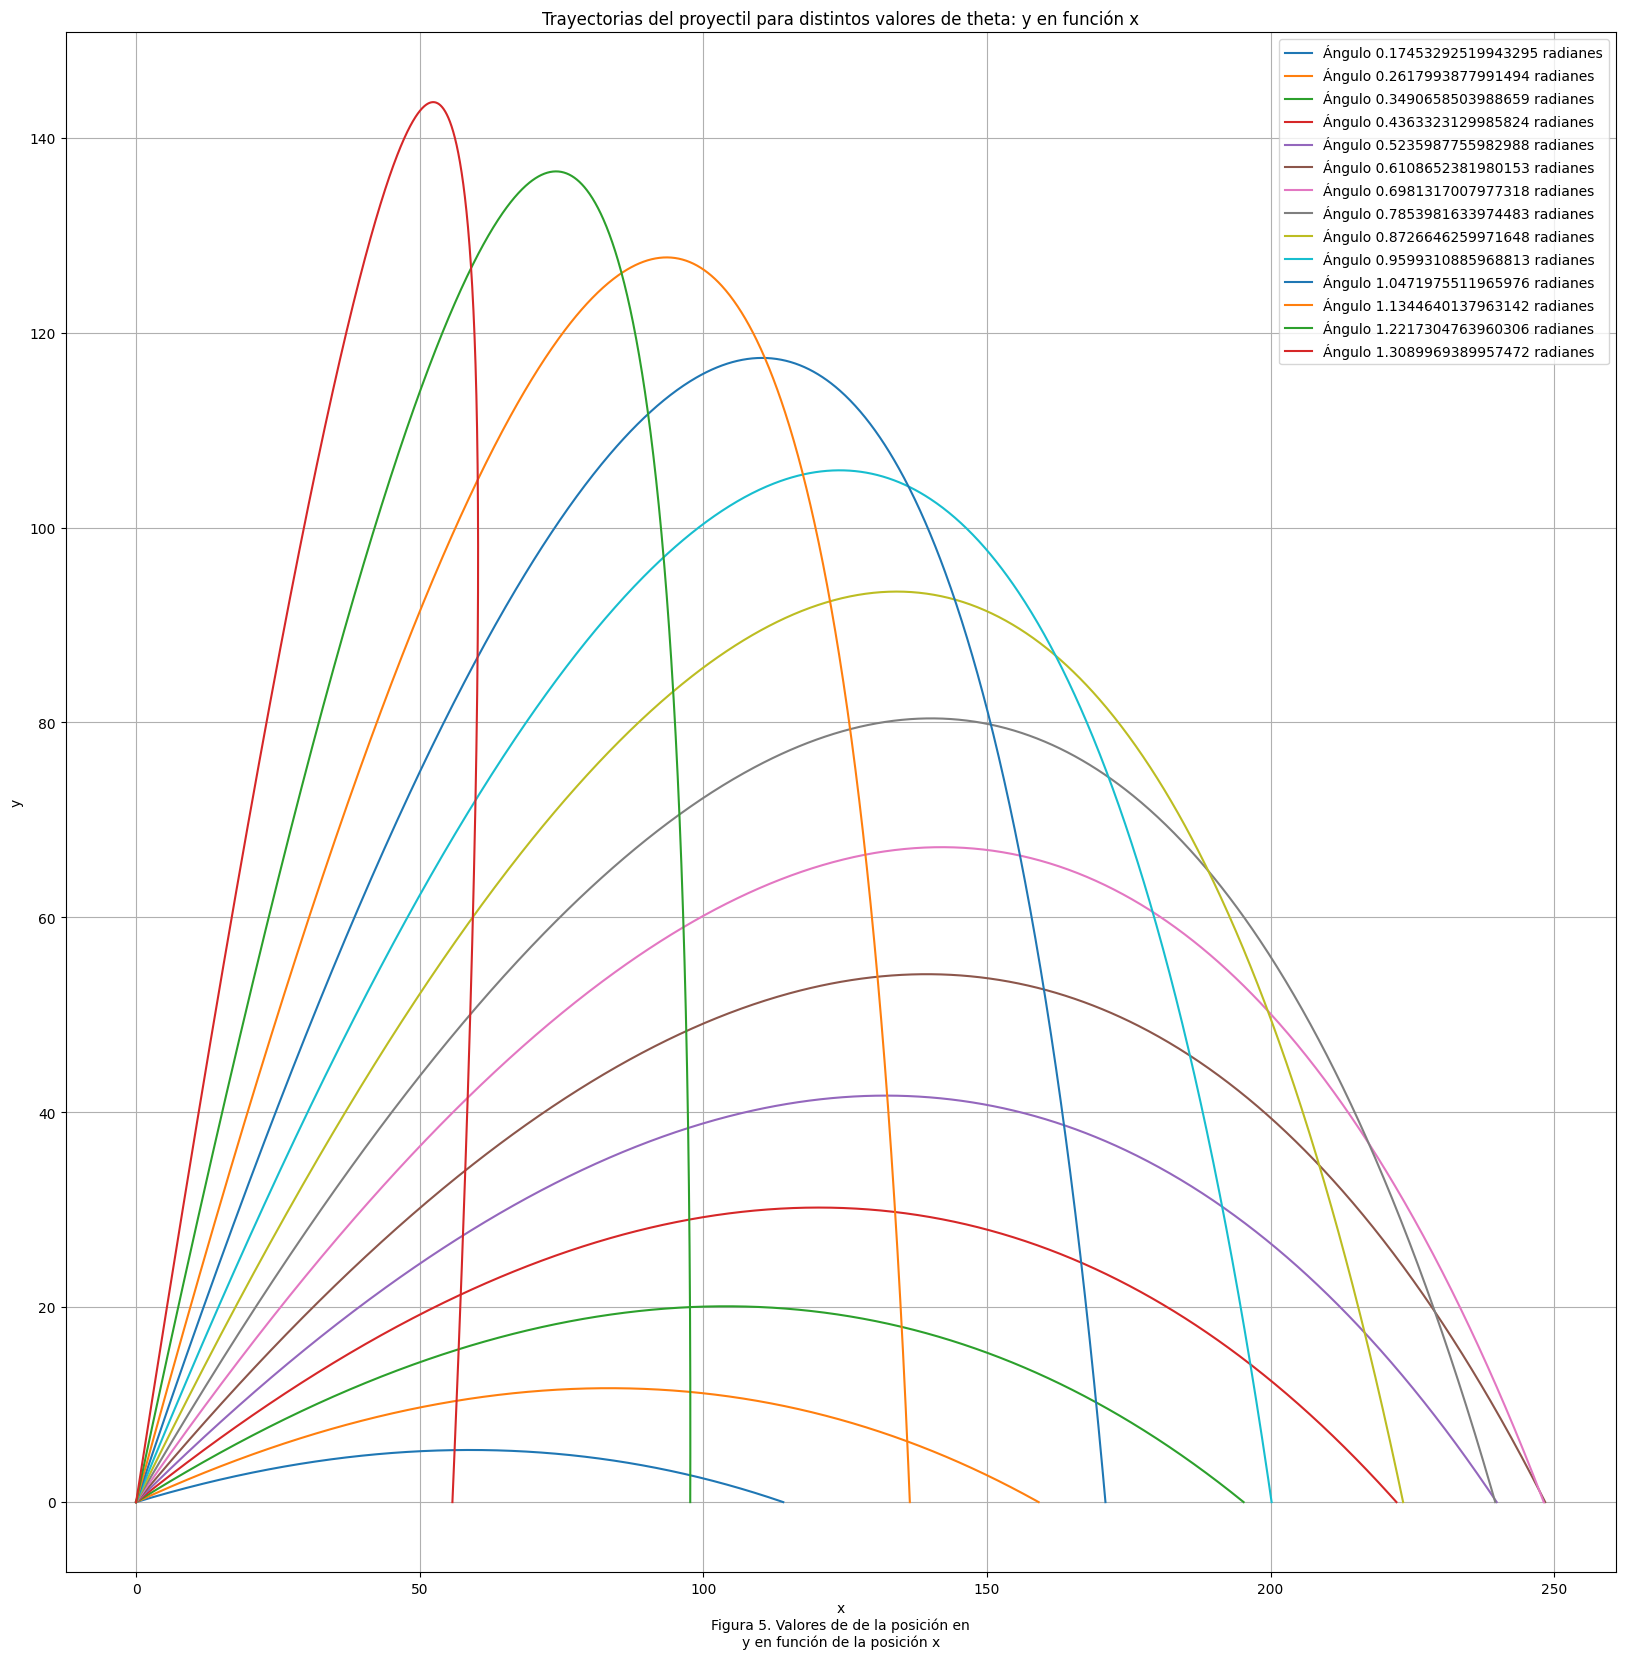

In [ ]:
#Para graficar las trayectorias, se va autilizar una iteración
plt.figure(figsize=(20,20))

for i in theta_radianes:
    df1 = trayectorias(i, alpha, v0, b, u, g)
    plt.plot(df1['x'],df1['y'],label=f'Ángulo {i} radianes')

plt.title('Trayectorias del proyectil para distintos valores de theta: y en función x')
plt.ylabel('y')
plt.xlabel('''x
Figura 5. Valores de de la posición en
y en función de la posición x''')
plt.legend()
plt.grid()

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

In [ ]:
#Defidiendo las ecuaciones en una sistema con una respuesta en vectores
def sistema_x_y(t_theta, alpha, v0, b, u,g):
  t, theta = t_theta
  x = (u*np.cos(alpha)*t)+(1/b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp((-1)*b*t))
  y = (1/b)*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp((-1)*b*t))-((g/b)-u*np.sin(alpha))*t
  return np.array([x,y])

#Ahora definiendo unas condiciones inciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8
Params_=(alpha, v0, b, u, g)  #Parametros en tupla, quitando el valor de theta, para enocntrar la solción con respecto a theta y t

condiciones=np.array([0,theta])


In [ ]:
raices=optimize.fsolve(sistema_x_y,condiciones,args=Params_)
theta_critico=raices[1]
print(f'El ángulo critico es {theta_critico}')

El ángulo critico es 0.7853981633974483


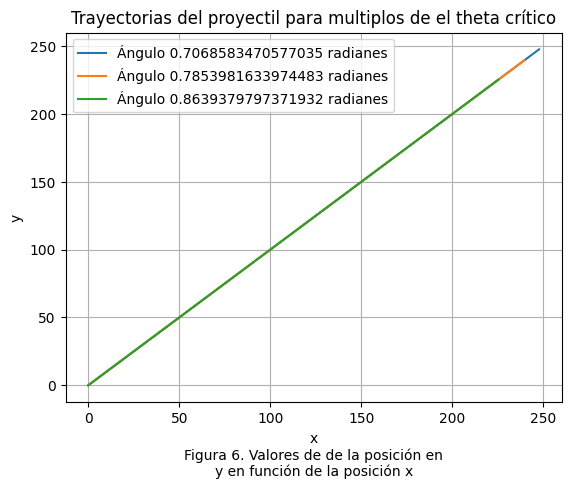

In [ ]:
#Ahora realiznado un grafico para los distintos para valores de theta
mul_theta_critico=np.array([0.9*theta_critico,theta_critico,1.1*theta_critico])

for i in mul_theta_critico:
  y_valor=lambda t: (1/b)*((g/b)+v0*np.sin(i)-u*np.sin(alpha))*(1-np.exp((-1)*b*t))-((g/b)-u*np.sin(alpha))*t
  #Tiempo de vuelo
  tiempo_final=optimize.newton(y_valor,10)
  ti=np.linspace(0,tiempo_final,1000)
  #Desarollo para x y y
  x=pos_x(ti,i,*Params_)
  y=pos_x(ti,i,*Params_)
  plt.plot(x,y,label=f'Ángulo {i} radianes')

plt.title('Trayectorias del proyectil para multiplos de el theta crítico')
plt.ylabel('y')
plt.xlabel('''x
Figura 6. Valores de de la posición en
y en función de la posición x''')
plt.legend()
plt.grid()



7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

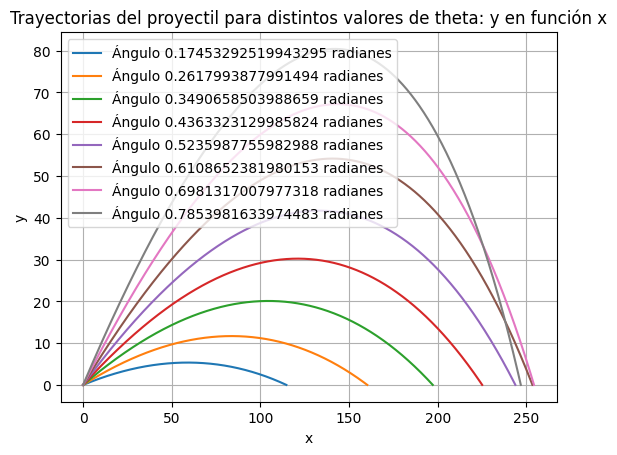

In [ ]:
#Deniendo el intervalo de thetas
theta_=np.deg2rad(np.arange(10,50,5))

for i in theta_:
    df1 = trayectorias(i, alpha, v0, b, u, g)
    plt.plot(df1['x'],df1['y'],label=f'Ángulo {i} radianes')

plt.title('Trayectorias del proyectil para distintos valores de theta: y en función x')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()



8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.

In [ ]:
#Ahora construyendo una gráfica de alcance máximo en función del ángulo
def alcance_maximoR(a, alpha, v0, b, u, g):
    # Para calcular las raíces de esta función
    y_valor=lambda t: (1/b) * ((g/b) + v0 * np.sin(a) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - ((g/b) - u * np.sin(alpha)) * t

    # La raíz es el tiempo de vuelo
    tfi=optimize.newton(y_valor, 10)

    # Evaluación de x en el punto tfi
    xe=pos_x(tfi, a, alpha, v0, b, u, g)

    return xe

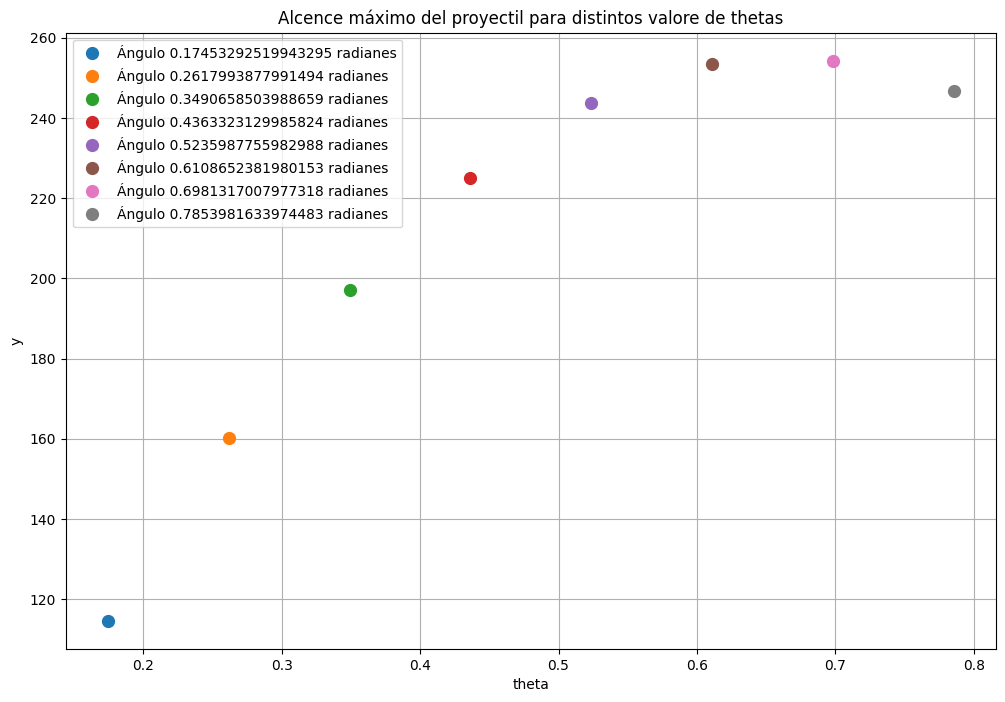

In [ ]:
#Iteraciones para lograr obtner los múltiples valores
plt.figure(figsize=(12,8))

for i in theta_:
    x=alcance_maximoR(i, alpha, v0, b, u, g)
    plt.plot(i,x,'.', label=f'Ángulo {i} radianes',markersize=17)

plt.title('Alcence máximo del proyectil para distintos valore de thetas')
plt.ylabel('y')
plt.xlabel('theta')
plt.legend()
plt.grid()